#  <h1 align="center"><font size="7">PyTorch Session 3</font></h1>


## Libraries

In [ ]:
# These are the libraries will be used.

import torch            # PyTorch Library.
import numpy as np 
import pandas as pd
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)
import os
from matplotlib.pyplot import imshow
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Check PyTorch version

torch.__version__

'1.13.1+cu116'

## Simple Dataset

### Simple dataset

In [ ]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [ ]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x7f023bb628e0>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  100


In [ ]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y=our_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])


In [ ]:
for x,y in our_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 

In [ ]:
my_dataset = toy_set(length = 50)
print("My toy_set length: ", len(my_dataset))

My toy_set length:  50


### Transforms

In [ ]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [ ]:
# Create an add_mult transform object, and an toy_set object

a_m = add_mult()
data_set = toy_set()

In [ ]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

In [ ]:
# Create a new data_set object with add_mult object as transform

cust_data_set = toy_set(transform = a_m)

In [ ]:
cust_data_set

In [ ]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

In [ ]:
class my_add_mult(object):   
    def __init__(self, add = 2, mul = 10):
        self.add=add
        self.mul=mul
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.add
        y = y + self.add
        x = x * self.mul
        y = y * self.mul
        sample = x, y
        return sample
        
       
my_dataset = toy_set(transform = my_add_mult())
for i in range(3):
    x_, y_ = my_dataset[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)
  

Index:  0 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([30.])
Index:  1 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([30.])
Index:  2 Transformed x_: tensor([40., 40.]) Transformed y_: tensor([30.])


### Compose

In [ ]:
# Run the command below when you do not have torchvision installed
# !mamba install -y torchvision

from torchvision import transforms

In [ ]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [ ]:
# Combine the add_mult() and mult()

data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)

The combination of transforms (Compose):  Compose(
)


In [ ]:
data_transform(data_set[0])

(tensor([300., 300.]), tensor([200.]))

In [ ]:
x,y=data_set[0]
x_,y_=data_transform(data_set[0])
print( 'Original x: ', x, 'Original y: ', y)

Original x:  tensor([2., 2.]) Original y:  tensor([1.])


In [ ]:
print( 'Transformed x_:', x_, 'Transformed y_:', y_)

Transformed x_: tensor([300., 300.]) Transformed y_: tensor([200.])


In [ ]:
# Create a new toy_set object with compose object as transform

compose_data_set = toy_set(transform = data_transform)
compose_data_set

In [ ]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)
    x_co, y_co = compose_data_set[i]
    print('Index: ', i, 'Compose Transformed x_co: ', x_co ,'Compose Transformed y_co: ',y_co)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  0 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])


In [ ]:
my_compose = transforms.Compose([mult(), add_mult()])
my_transformed_dataset = toy_set(transform = my_compose)
for i in range(3):
    x_, y_ = my_transformed_dataset[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Transformed x_: tensor([201., 201.]) Transformed y_: tensor([200.])
Index:  1 Transformed x_: tensor([201., 201.]) Transformed y_: tensor([200.])
Index:  2 Transformed x_: tensor([201., 201.]) Transformed y_: tensor([200.])


## Image Datasets and Transforms

### Download the dataset

In [ ]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data

--2023-03-20 11:26:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K  --.-KB/s    in 0.02s   

2023-03-20 11:26:58 (1.96 MB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]



In [ ]:
!tar -xf /resources/data/img.tar.gz 

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2023-03-20 11:27:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  5.90MB/s    in 0.3s    

2023-03-20 11:27:14 (5.90 MB/s) - ‘index.csv’ saved [1680905/1680905]



In [ ]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

### Auxiliary Functions

In [ ]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [ ]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [ ]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


In [ ]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [ ]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [ ]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


### Load Image

In [ ]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [ ]:
image_path=os.path.join(directory,image_name)
image_path

'img/fashion1.png'

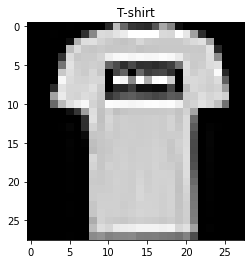

In [ ]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

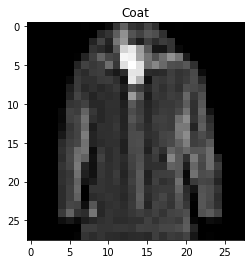

In [ ]:
# Plot the 20th image
directory = '/content/'
image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

### Create a Dataset Class

In [ ]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [ ]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

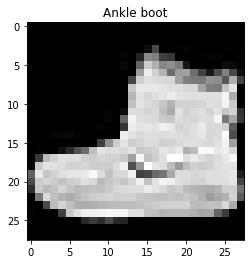

In [ ]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [ ]:
y

'Ankle boot'

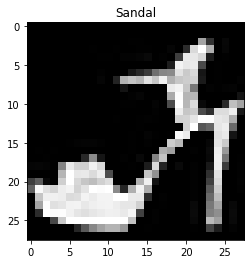

In [ ]:
image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

### Torchvision Transforms

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


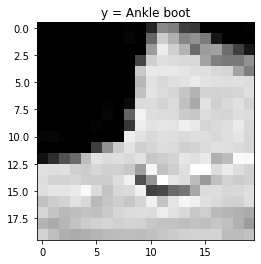

In [ ]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

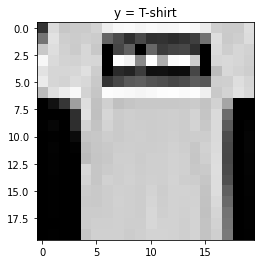

In [ ]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

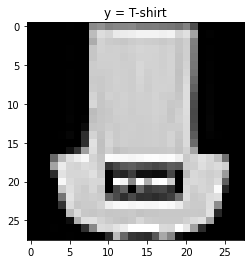

In [ ]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

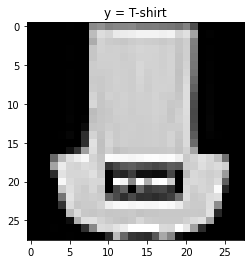

In [ ]:
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

## Prebuilt Datasets and Transforms

In [ ]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [ ]:
# Run the command below when you do not have torchvision installed
# !mamba install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Import the prebuilt dataset into variable dataset


dataset = dsets.MNIST(
    root = './data',  
    download = True, 
    transform = transforms.ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  5
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


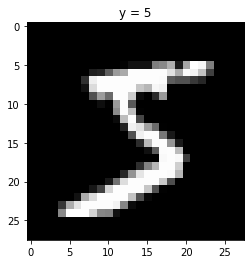

In [ ]:
# Plot the first element in the dataset

show_data(dataset[0])

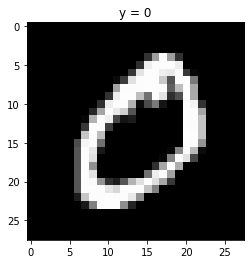

In [ ]:
# Plot the second element in the dataset

show_data(dataset[1])

In [ ]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


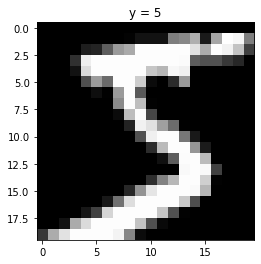

In [ ]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

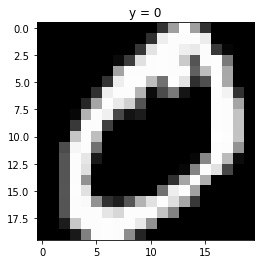

In [ ]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

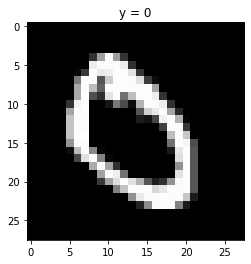

In [ ]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

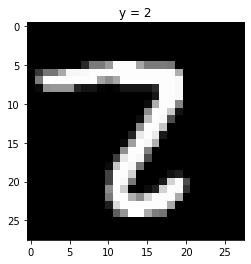

In [ ]:
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = my_data_transform)
show_data(dataset[1])